# РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

In [113]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

<ipython-input-114-23f9ac4017f6>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')


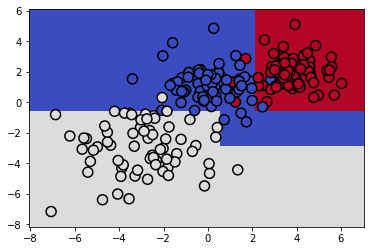

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Параметры решающего дерева, которые понадобятся для решения задачи:

`max_depth` — максимальная глубина дерева.   
`max_features` — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.   
`min_samples_leaf` — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.   

In [115]:
data = pd.read_csv('./Unit_7_data/bill_authentication.csv')

## Задание 5.2.3
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за **0.2**, **random_state = 17** для разбиения и дерева. Максимальную глубину дерева примите за **3**, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за **2**. Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [116]:
X, y= data.drop(columns='Class').values, data.Class.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 17 )

In [117]:
model  = DecisionTreeClassifier(max_depth=3,max_features=2,random_state = 17)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [118]:
y_pred = model.predict(X_test)
ans = f1_score(y_test,y_pred)

In [119]:
round(ans,3)

0.866

## Задание 5.2.4
Проклассифицируйте банкноту с вектором признаков ***2.04378,-0.38422,1.437292,0.76421.*** К какому классу она относится?

In [120]:
feats = np.array([[2.04378,-0.38422,1.437292,0.76421]])
model.predict(feats)[0]

0

# РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

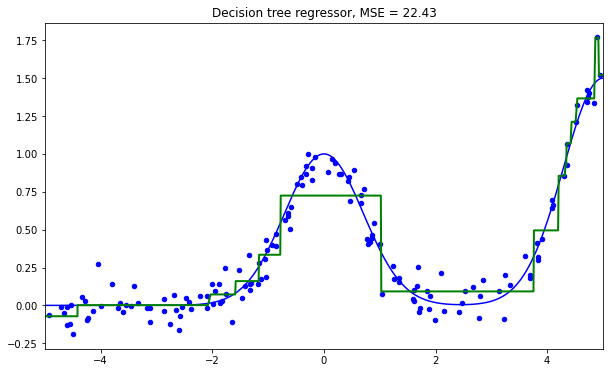

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

БОРЬБА С ПЕРЕОБУЧЕНИЕМ (РЕГУЛЯРИЗАЦИЯ)

Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:

- Задать порог по мере неопределённости $I(S) \leq \theta$: 
- Задать порог по размеру узла:$\left |S \right | \leq n$ 
- Задать порог на глубину: $Depth(T)=d$
- Задать порог на размер потомков $\left | S_L \right |\leq n_1$ & $\left | S_R \right | \leq n_2$, здесь $S$ — это узел дерева, $T$  — дерево, $\left | S_R \right | \leq n_2$ — количество элементов в узле, $S_L, S_R$ — соответственно правый и левый потомок узла $s$ .




# ЗАДАЧА О ПОТРЕБЛЕНИИ ТОПЛИВА

![](https://lms.skillfactory.ru/assets/courseware/v1/ed0db361d56c96e2781ff6dd393e616b/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/eastwood-downloading.png)

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива

## Задание 5.2.5
Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за **0.3**, **random_state = 42** для разбиения и дерева. Вычислите `RMSE`, округлите до *двух знаков* после точки-разделителя.

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [123]:
data = pd.read_csv('./Unit_7_data/petrol_consumption.csv')

In [124]:
X,y = data.drop(columns='Petrol_Consumption'),data.Petrol_Consumption

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 42)

In [126]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [127]:
y_pred = model.predict(X_test)

In [128]:
ans = np.sqrt(mean_squared_error(y_test,y_pred))
round(ans,2)

87.97

In [129]:
model.get_depth()

11

# ЗАДАЧА О ВИНАХ
Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 



Датасет можно скачать [здесь](https://lms.skillfactory.ru/assets/courseware/v1/2daeecee174368f8a33b82c8cccae3a5/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/winequality-red.csv).

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр ***quality*** которого не менее ***6***.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами `test_size=0.30, random_state=42`.

Обучите два классификатора: **логистическую регрессию** (с дефолтными параметрами) и **решающее дерево** ***(random_state=42, максимальная глубина равна 10)***.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [131]:
data = pd.read_csv('./Unit_7_data/winequality-red.csv',sep=';')

X, y = data.drop(columns='quality'), (data.quality<6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [132]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42, max_depth=10)

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test.values)
y_pred_dt = dt.predict(X_test.values)

metrica_lr = f1_score(y_test,y_pred_lr)
metric_dt = f1_score(y_test,y_pred_dt)
metrica_lr,metric_dt

C:\Users\Manych\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6990740740740741, 0.7035175879396987)

In [133]:
ans = max(metrica_lr,metric_dt)
ans

0.7035175879396987

Обучите модель с использование бэггинга (функция `BaggingClassifier` с **random_state=42**, разделение выборки на обучающую и тренировочную с параметрами **test_size=0.30, random_state=42**) для алгоритма, показавшего лучшее качество, определите количество моделей **1500**. Вычислите новое значение **f1-score**.

In [136]:
data = pd.read_csv('./Unit_7_data/winequality-red.csv',sep=';')

X, y = data.drop(columns='quality'), (data.quality<6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [139]:
bgc = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=10),
                        random_state=42,
                        n_estimators = 1500 )

In [140]:
bgc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=42),
                  n_estimators=1500, random_state=42)

In [141]:
y_pred_bgc = bgc.predict(X_test)

In [142]:
f1_score(y_test,y_pred_bgc)

0.7777777777777778

# 5.6. Случайный лес
## РЕАЛИЗАЦИЯ НА PYTHON  И ПОДБОР ПАРАМЕТРОВ
Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Потренируемся на данных, по которым мы будем предсказывать погоду

Откроем его, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [143]:
weather=pd.read_csv('./Unit_7_data/temps_extended.csv')
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train, Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [145]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

- n_estimators 
- max_features 
- max_depth 
- min_samples_split 
- min_samples_leaf
- bootstrap

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [147]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Обучим наш лес:

In [148]:
%%time
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
Давайте посмотрим, какие гиперпараметры нам предлагают как оптимальные:

In [149]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

## Задание 5.6.1
Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте `random_state =42`. Какое улучшение `MSE` дала подстановка отобранных гиперпараметров? Ответ округлите до одного знака после запятой.

In [154]:
bs = rf_random.best_estimator_
rf = RandomForestRegressor(random_state = 42)

bs.fit(X_train,Y_train)
rf.fit(X_train,Y_train)

Y_pred_bs = bs.predict(X_val)
Y_pred_rf = rf.predict(X_val)

mse_bs = mean_squared_error(Y_val,Y_pred_bs)
mse_rf = mean_squared_error(Y_val,Y_pred_rf)

ans = mse_rf - mse_bs
round(ans,1)

1.5

# 5.7. Практика
Разберёмся с **ансамблями алгоритмов** и со **случайным лесом**. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

Сделаем **базовую предобработку данных**: удалим признак, который отвечает за идентификатор пользователя, как нерепрезентативный признак.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./Unit_7_data/HR-dataset.csv')

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. 

In [176]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

Масштабируем признаки для последующего сравнения результатов:

In [177]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

В дальнейшем будем оценивать качество модели на кросс-валидации на пяти фолдах при помощи точности ($accuracy$).

In [178]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

Посмотрим на то, как работает бэггинг над решающими деревьями.

```
Бэггинг (bagging, сокр. от bootstrap aggregating*)  — метод построения композиции алгоритмов, в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. Итоговый алгоритм принимает решения посредством голосования среди всех алгоритмов (возвращается самый частый ответ).
```
Посмотрим на точность одного дерева:

In [181]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9737977325775258


Проведём бэггинг: для этого достаточно обернуть исходный классификатор в BaggingClassifier.

In [182]:
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Decision tree bagging: 0.9883994220295655


Стандартная эвристика: в задаче классификации брать квадратный корень числа признаков, а в задаче регрессии — треть числа признаков.

In [183]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9919329776592198


Ещё одно преимущество использования бэггинга для агрегации моделей — получение оценки работы классификатора без дополнительного проведения кросс-валидации при помощи `out-of-bag scor`. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр `oob_score = True`, что имеет смысл при достаточном количестве деревьев.

In [184]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.993132875525035

Метод бэггинга можно применять к **произвольным алгоритмам**, например, к логистической регрессии. 

In [185]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

LR: 0.7709770367900411


In [188]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.7707102367455819


В её случае он не так сильно повышает качество, поскольку линейные модели не так сильно зависят от состава обучающей выборки. Попробуем убрать часть признаков.

In [189]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.7513804823830166


# ====================================================

In [174]:
df.max()

empid                        15999
satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
dept                     technical
salary                      medium
dtype: object